<a href="https://colab.research.google.com/github/Senuth-Per/ML_Coursework_Banking_Systerm/blob/main/Ml_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset Shape: (41188, 21)

Missing Values (count of 'unknown'):
age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

Data Types:
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price

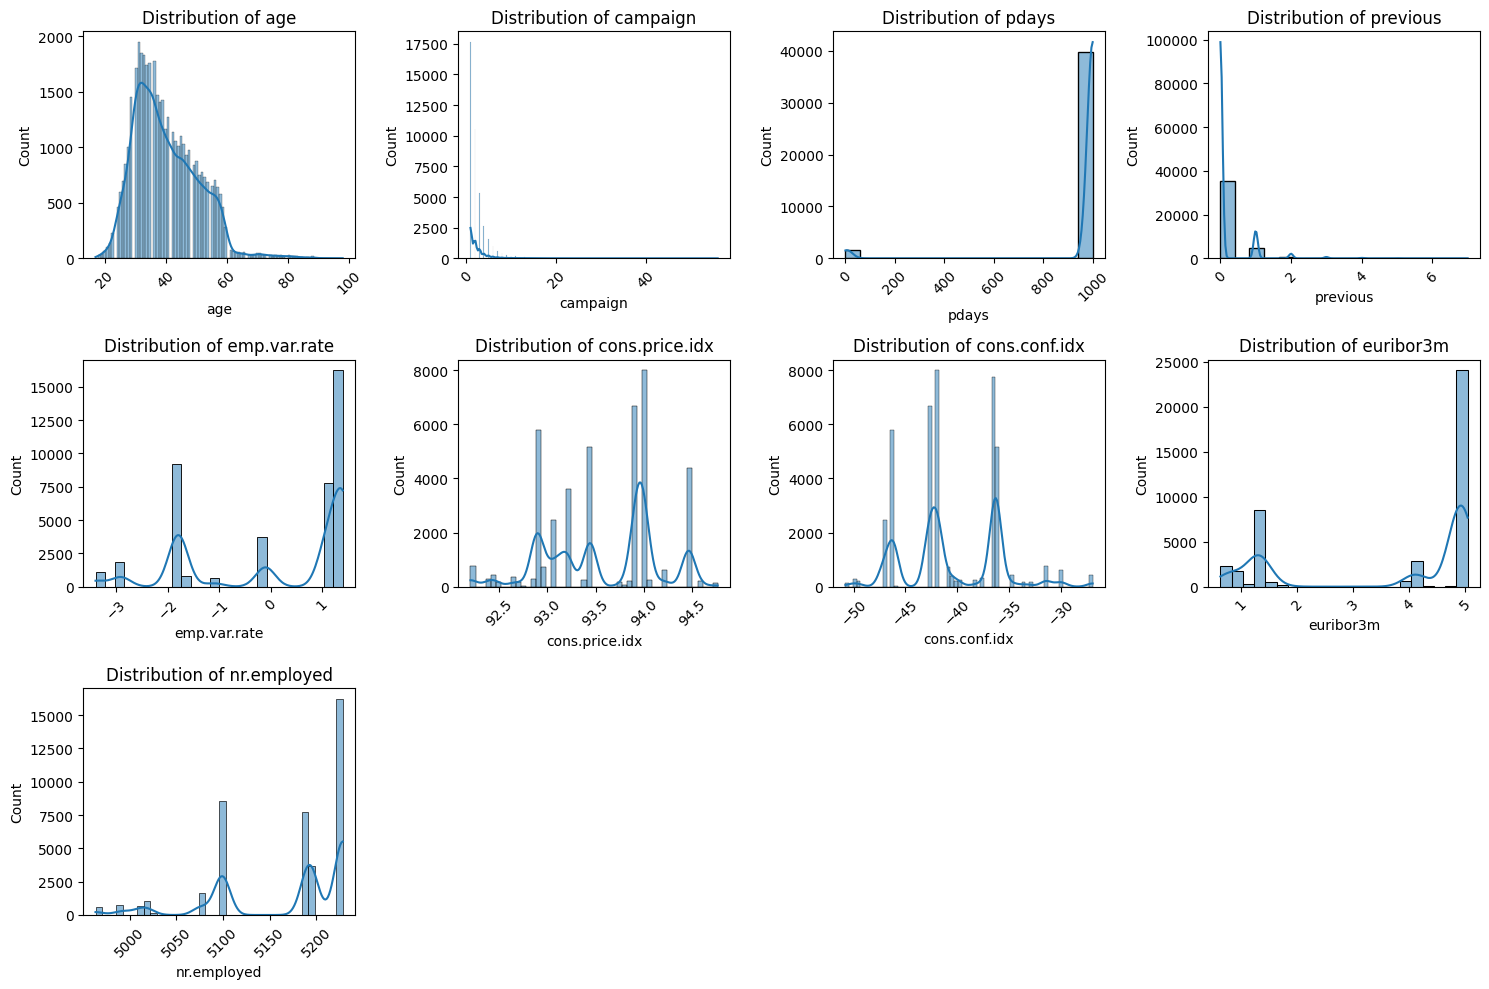

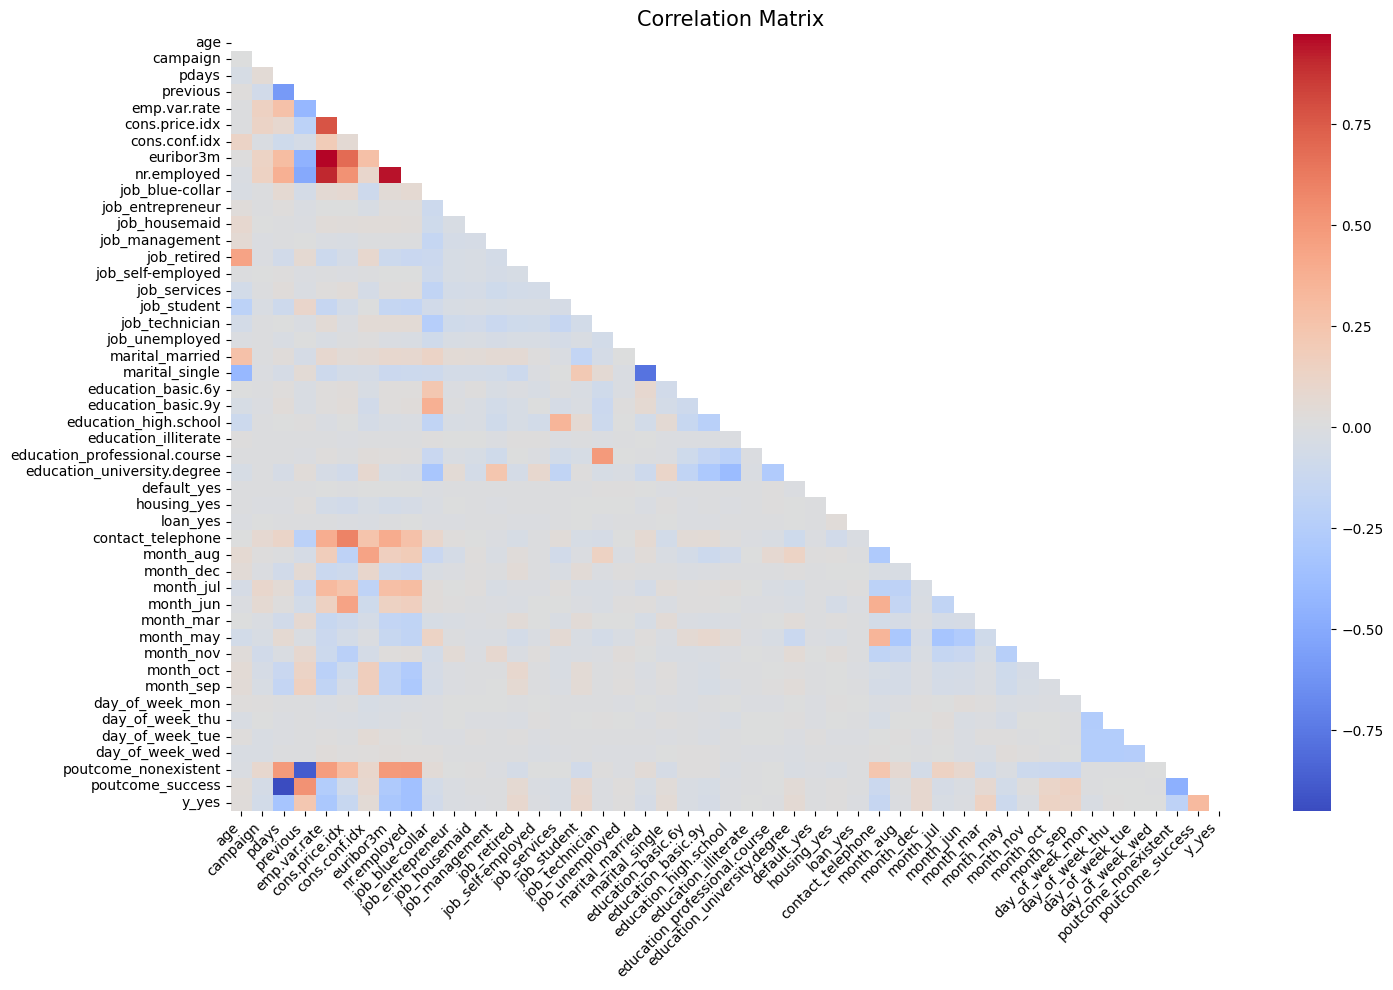


Final dataset shapes:
X_train shape: (32940, 46)
X_test shape: (8236, 46)
y_train shape: (32940,)
y_test shape: (8236,)


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/bank-additional-full.csv"  # Update with your file's actual path
df = pd.read_csv(file_path, sep=';')

# Function to display basic dataset information
def dataset_info(df):
    print("Dataset Shape:", df.shape)
    print("\nMissing Values (count of 'unknown'):")
    print((df == 'unknown').sum())
    print("\nData Types:")
    print(df.dtypes)

# Display basic dataset information
dataset_info(df)

#Remove Duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()

# Handle 'unknown' values
def handle_unknown_values(df):
    # Replace 'unknown' with NaN for easier processing
    df = df.replace('unknown', np.nan)

    # Separate categorical and numerical columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

    # Impute categorical columns with mode
    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_columns] = cat_imputer.fit_transform(df[categorical_columns])

    # Impute numerical columns with median
    num_imputer = SimpleImputer(strategy='median')
    df[numerical_columns] = num_imputer.fit_transform(df[numerical_columns])

    return df

# Clean the dataset
df_cleaned = handle_unknown_values(df.copy())

# Encode categorical variables
def encode_categorical_variables(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
    return df

# Encode categorical variables using OneHotEncoder
df_encoded = encode_categorical_variables(df_cleaned.copy())

# Scale numerical variables
def scale_numerical_variables(df):
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    scaler = StandardScaler()
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
    return df

# Scale numerical variables
df_scaled = scale_numerical_variables(df_encoded.copy())

# Handle the 'duration' feature
# Note: Remove 'duration' for realistic predictive modeling as per dataset guidelines
if 'duration' in df_scaled.columns:
    df_scaled = df_scaled.drop('duration', axis=1)

# Split features and target
X = df_scaled.drop('y_yes', axis=1)  # Adjust target column based on encoding
y = df_scaled['y_yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to plot feature distributions
def plot_distributions(df, numerical_cols):
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(3, 4, i)
        sns.histplot(data=df, x=col, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot distributions for numerical features
numerical_features = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
                      'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
plot_distributions(df_cleaned, numerical_features)

# Function to plot correlation matrix
def plot_correlation_matrix(df):
    # Assuming 'df' is your DataFrame with the data
    correlation_matrix = df.corr()

    # Plotting the correlation matrix
    plt.figure(figsize=(15, 10))  # Adjust figure size for better readability
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle
    sns.heatmap(correlation_matrix, mask=mask, annot=False, fmt=".2f", cmap="coolwarm", cbar=True)

    # Rotate x and y axis labels for readability
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)

    plt.title("Correlation Matrix", fontsize=15)
    plt.tight_layout()  # Adjust layout to prevent label cutoff
    plt.show()

# Plot correlation matrix
plot_correlation_matrix(df_scaled)

# Print shapes of the resulting datasets
print("\nFinal dataset shapes:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Save preprocessed data (optional)
X_train.to_csv('/content/drive/MyDrive/banking_system/X_train.csv', index=False)
X_test.to_csv('/content/drive/MyDrive/banking_system/X_test.csv', index=False)
y_train.to_csv('/content/drive/MyDrive/banking_system/y_train.csv', index=False)
y_test.to_csv('/content/drive/MyDrive/banking_system/y_test.csv', index=False)



In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, classification_report, confusion_matrix,
                             ConfusionMatrixDisplay, roc_curve)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load preprocessed data
X_train = pd.read_csv('/content/drive/MyDrive/banking_system/X_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/banking_system/X_test.csv')
y_train = pd.read_csv('/content/drive/MyDrive/banking_system/y_train.csv').squeeze()  # Convert to Series
y_test = pd.read_csv('/content/drive/MyDrive/banking_system/y_test.csv').squeeze()    # Convert to Series

# Random Forest Model
def train_random_forest(X_train, y_train, X_test, y_test):
    rf_model = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    )
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

    # Evaluation Metrics
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    precision_rf = precision_score(y_test, y_pred_rf)
    recall_rf = recall_score(y_test, y_pred_rf)
    f1_rf = f1_score(y_test, y_pred_rf)
    roc_auc_rf = roc_auc_score(y_test, y_proba_rf)

    print("\nRandom Forest Results:")
    print(f"Accuracy: {accuracy_rf:.5f}")
    print(f"Precision: {precision_rf:.5f}")
    print(f"Recall: {recall_rf:.5f}")
    print(f"F1-score: {f1_rf:.5f}")
    print(f"AUC-ROC: {roc_auc_rf:.5f}")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc_rf:.5f})", color='blue')
    plt.plot([0, 1], [0, 1], 'k--', label="Random")
    plt.title("Random Forest ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid()
    plt.show()

    # Confusion Matrix
    cm_rf = confusion_matrix(y_test, y_pred_rf)
    disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
    disp_rf.plot(cmap=plt.cm.Blues)
    plt.title("Random Forest Confusion Matrix")
    plt.show()

    return {
        'model': rf_model,
        'accuracy': accuracy_rf,
        'precision': precision_rf,
        'recall': recall_rf,
        'f1': f1_rf,
        'auc_roc': roc_auc_rf
    }


Random Forest Results:
Accuracy: 0.89437
Precision: 0.67354
Recall: 0.20185
F1-score: 0.31062
AUC-ROC: 0.79642


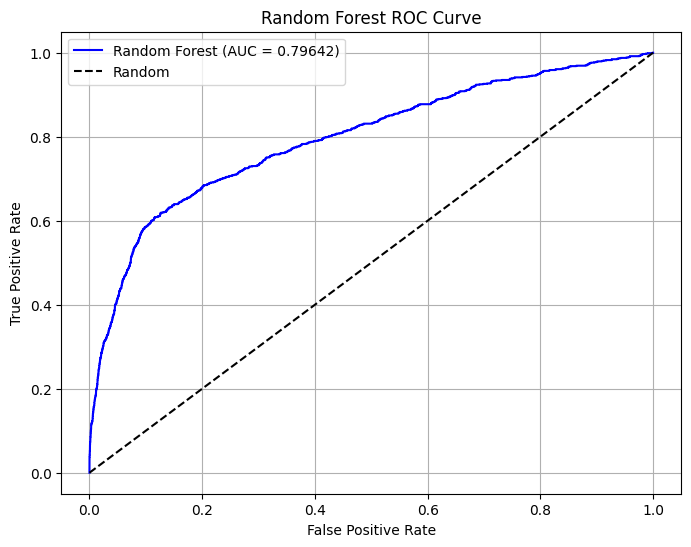

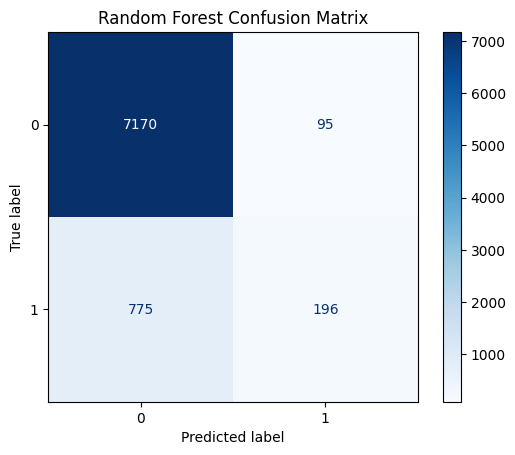

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8629 - loss: 0.3556 - val_accuracy: 0.8974 - val_loss: 0.2830
Epoch 2/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8990 - loss: 0.2794 - val_accuracy: 0.8968 - val_loss: 0.2814
Epoch 3/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8997 - loss: 0.2805 - val_accuracy: 0.8959 - val_loss: 0.2795
Epoch 4/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9002 - loss: 0.2807 - val_accuracy: 0.8957 - val_loss: 0.2793
Epoch 5/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9019 - loss: 0.2756 - val_accuracy: 0.8957 - val_loss: 0.2786
Epoch 6/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9001 - loss: 0.2776 - val_accuracy: 0.8951 - val_loss: 0.2794
Epoch 7/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9026 - loss: 0.2679 - val_accuracy: 0.8948 - val_loss: 0.2801
Epoch 8/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9039 - loss: 0.2677 - val_accuracy: 0.8974 - val_

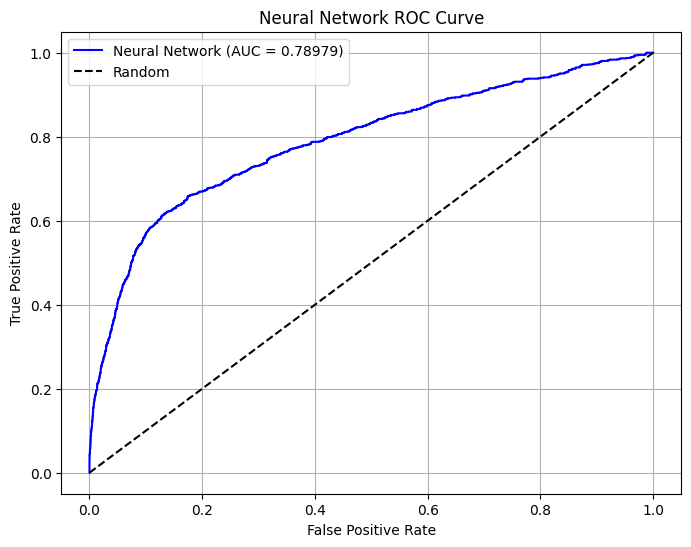

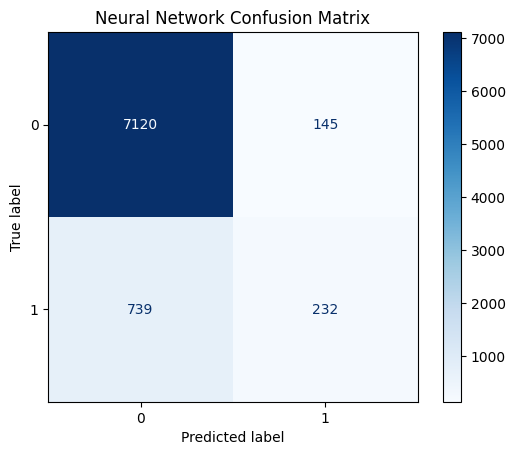

In [5]:
# Neural Network Model
def train_neural_network(X_train, y_train, X_test, y_test):

    # Define model
    nn_model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')  # Output layer with sigmoid for binary classification
    ])

    # Compile model
    nn_model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    # Early stopping callback to prevent overfitting
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )

    # Train model with validation split
    history = nn_model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

    # Evaluate model
    y_pred_nn = (nn_model.predict(X_test) > 0.5).astype("int32").flatten()
    y_proba_nn = nn_model.predict(X_test)

    # Calculate metrics
    accuracy_nn = accuracy_score(y_test, y_pred_nn)
    precision_nn = precision_score(y_test, y_pred_nn)
    recall_nn = recall_score(y_test, y_pred_nn)
    f1_nn = f1_score(y_test, y_pred_nn)
    auc_roc_nn = roc_auc_score(y_test, y_proba_nn)

    print("\nNeural Network Results:")
    print(f"Accuracy: {accuracy_nn:.5f}")
    print(f"Precision: {precision_nn:.5f}")
    print(f"Recall: {recall_nn:.5f}")
    print(f"F1-score: {f1_nn:.5f}")
    print(f"AUC-ROC: {auc_roc_nn:.5f}")

    # ROC Curve for Neural Network
    fpr_nn, tpr_nn, _ = roc_curve(y_test, y_proba_nn) #Fixed indentation here
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_nn, tpr_nn, label=f"Neural Network (AUC = {auc_roc_nn:.5f})", color='blue')
    plt.plot([0, 1], [0, 1], 'k--', label="Random")
    plt.title("Neural Network ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid()
    plt.show()

    # Confusion Matrix for Neural Network
    cm_nn = confusion_matrix(y_test, y_pred_nn) #Fixed indentation here
    disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn) #Fixed indentation here
    disp_nn.plot(cmap=plt.cm.Blues) #Fixed indentation here
    plt.title("Neural Network Confusion Matrix") #Fixed indentation here
    plt.show() #Fixed indentation here

    return {
        'model': nn_model,
        'accuracy': accuracy_nn,
        'precision': precision_nn,
        'recall': recall_nn,
        'f1': f1_nn,
        'auc_roc': auc_roc_nn
    }

# Train and Evaluate Models
rf_metrics = train_random_forest(X_train, y_train, X_test, y_test)
nn_metrics = train_neural_network(X_train, y_train, X_test, y_test)


In [6]:
# Compare models
comparison_df = pd.DataFrame({
   'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC'],
   'Random Forest': [rf_metrics['accuracy'], rf_metrics['precision'],
                     rf_metrics['recall'], rf_metrics['f1'], rf_metrics['auc_roc']],
   'Neural Network': [nn_metrics['accuracy'], nn_metrics['precision'],
                      nn_metrics['recall'], nn_metrics['f1'], nn_metrics['auc_roc']]
})

print("\nModel Comparison:")
print(comparison_df.to_string(index=False))

# Determine the best model based on AUC-ROC score
if rf_metrics['auc_roc'] > nn_metrics['auc_roc']:
   print("Random Forest performed better.")
else:
   print("Neural Network performed better.")




Model Comparison:
   Metric  Random Forest  Neural Network
 Accuracy       0.894366        0.892666
Precision       0.673540        0.615385
   Recall       0.201854        0.238929
 F1-Score       0.310618        0.344214
  AUC-ROC       0.796420        0.789787
Random Forest performed better.
